<a href="https://colab.research.google.com/github/JiyaJulius/Heart-Disease-prediction/blob/main/HD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN - LSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler # Import LabelEncoder and StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical # Import to_categorical
from tensorflow.keras.layers import Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Preprocess Data
# Handle missing values by removing rows with NaNs
data = pd.read_csv("combined_dataset.csv")
data = data.dropna()

# Split features and target
X = data.drop("target", axis=1)
y = data["target"]

# Encode target labels (0 or 1)
y = LabelEncoder().fit_transform(y)
y = to_categorical(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN input (samples, timesteps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build Hybrid CNN-LSTM Model
input_layer = Input(shape=(X_train.shape[1], 1))

# CNN Layers
conv1 = Conv1D(filters=64, kernel_size=4, activation='relu')(input_layer)
batch1 = BatchNormalization()(conv1)
pool1 = MaxPooling1D(pool_size=2)(batch1)

conv2 = Conv1D(filters=128, kernel_size=4, activation='relu')(pool1)
batch2 = BatchNormalization()(conv2)
pool2 = MaxPooling1D(pool_size=2)(batch2)


flatten = Flatten()(pool2)

# Reshape for LSTM input (samples, timesteps, features)
lstm_input = tf.keras.layers.Reshape((-1, 1))(flatten)

# Now pass this reshaped input to the LSTM layer
lstm = LSTM(64, return_sequences=False)(lstm_input)

# Fully Connected Layers
dense1 = Dense(128, activation='relu')(lstm)
dropout1 = Dropout(0.3)(dense1)
dense2 = Dense(64, activation='relu')(dropout1)

# Output Layer
# Change the number of units in the Dense layer to match the number of classes in your target (5)
output_layer = Dense(2, activation='softmax')(dense2)

# Compile Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# Train Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 13, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 10, 64)              │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 10, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 2, 128)              │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 128, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,586 (264.01 KB)

 Trainable params: 67,202 (262.51 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - accuracy: 0.5754 - loss: 0.6648 - val_accuracy: 0.4524 - val_loss: 1.1150
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.7622 - loss: 0.4926 - val_accuracy: 0.4524 - val_loss: 1.2002
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8161 - loss: 0.4278 - val_accuracy: 0.4524 - val_loss: 1.5807
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8189 - loss: 0.3945 - val_accuracy: 0.4524 - val_loss: 2.4864
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8691 - loss: 0.3464 - val_accuracy: 0.4524 - val_loss: 2.9653
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.8648 - loss: 0.3512 - val_accuracy: 0.4602 - val_loss: 1.7545
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.8452 - loss: 0.3596 - val_accuracy: 0.4730 - val_loss: 2.0435
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.8719 - loss: 0.3074 - val_accuracy: 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Get model predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_test_classes = np.argmax(y_test, axis=1) # Convert one-hot encoded y_test to class labels

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_classes, y_pred_classes))

# Calculate ROC-AUC Score
if len(np.unique(y_test_classes)) == 2:
    y_pred_prob = y_pred[:, 1]  # Probability of the positive class
    print("\nROC-AUC Score:", roc_auc_score(y_test_classes, y_pred_prob))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
Accuracy: 0.8560411311053985

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       176
           1       0.87      0.87      0.87       213

    accuracy                           0.86       389
   macro avg       0.85      0.85      0.85       389
weighted avg       0.86      0.86      0.86       389


Confusion Matrix:
 [[147  29]
 [ 27 186]]

ROC-AUC Score: 0.9418747332479727


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


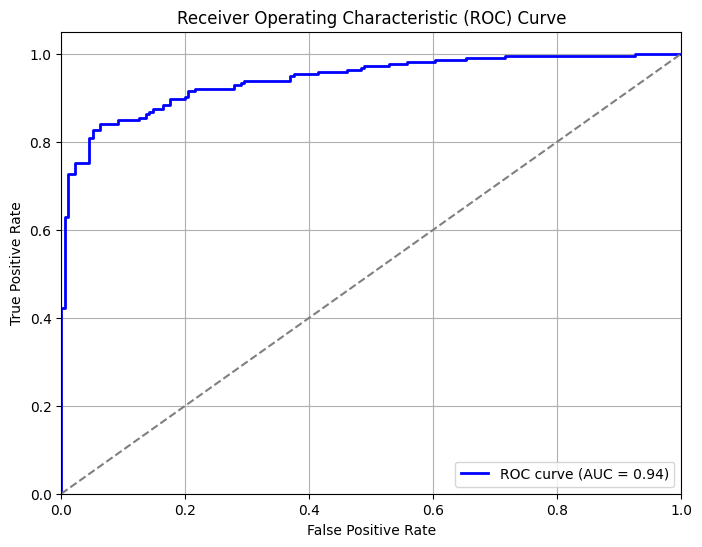

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get model predictions (probabilities)
y_pred_proba = model.predict(X_test)[:, 1]  # Assuming binary classification (probability for class 1)

# Compute ROC curve & AUC score
fpr, tpr, _ = roc_curve(y_test_classes, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
model.save("cnn_lstm_model.h5")

CNN - BiLSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Dense, Conv1D, MaxPooling1D, Flatten,
                                     Dropout, BatchNormalization, Bidirectional, LSTM, Reshape)
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
data = pd.read_csv("combined_dataset.csv").dropna()
X = data.drop("target", axis=1)
y = data["target"]

y = LabelEncoder().fit_transform(y)
y = to_categorical(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build Hybrid CNN-BiLSTM Model
input_layer = Input(shape=(X_train.shape[1], 1))

# CNN Layers
conv1 = Conv1D(filters=64, kernel_size=4, activation='relu')(input_layer)
batch1 = BatchNormalization()(conv1)
pool1 = MaxPooling1D(pool_size=2)(batch1)

conv2 = Conv1D(filters=128, kernel_size=4, activation='relu')(pool1)
batch2 = BatchNormalization()(conv2)
pool2 = MaxPooling1D(pool_size=2)(batch2)

flatten = Flatten()(pool2)

# Reshape for BiLSTM input
lstm_input = Reshape((-1, 1))(flatten)

# BiLSTM Layer
bilstm = Bidirectional(LSTM(64, return_sequences=False))(lstm_input)

# Fully Connected Layers
dense1 = Dense(128, activation='relu')(bilstm)
dropout1 = Dropout(0.3)(dense1)
dense2 = Dense(64, activation='relu')(dropout1)

# Output Layer
output_layer = Dense(2, activation='softmax')(dense2)

# Compile Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# Train Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 13, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 10, 64)              │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 2, 128)              │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 128, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 128)                 │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,674 (362.01 KB)

 Trainable params: 92,290 (360.51 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 158ms/step - accuracy: 0.5655 - loss: 0.6634 - val_accuracy: 0.4524 - val_loss: 1.6026
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7803 - loss: 0.4788 - val_accuracy: 0.4524 - val_loss: 2.3465
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.8094 - loss: 0.4293 - val_accuracy: 0.4524 - val_loss: 1.6485
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.8153 - loss: 0.4080 - val_accuracy: 0.4524 - val_loss: 2.3914
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.8425 - loss: 0.3689 - val_accuracy: 0.4524 - val_loss: 2.2359
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - accuracy: 0.8696 - loss: 0.3346 - val_accuracy: 0.4679 - val_loss: 1.6458
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.8512 - loss: 0.3416 - val_accuracy: 0.5064 - val_loss: 1.5969
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.8858 - loss: 0.2873 - val_

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Get model predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_test_classes = np.argmax(y_test, axis=1) # Convert one-hot encoded y_test to class labels

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_classes, y_pred_classes))

# Calculate ROC-AUC Score
if len(np.unique(y_test_classes)) == 2:
    y_pred_prob = y_pred[:, 1]  # Probability of the positive class
    print("\nROC-AUC Score:", roc_auc_score(y_test_classes, y_pred_prob))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
Accuracy: 0.8688946015424165

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       176
           1       0.86      0.91      0.88       213

    accuracy                           0.87       389
   macro avg       0.87      0.86      0.87       389
weighted avg       0.87      0.87      0.87       389


Confusion Matrix:
 [[144  32]
 [ 19 194]]

ROC-AUC Score: 0.9237089201877934


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


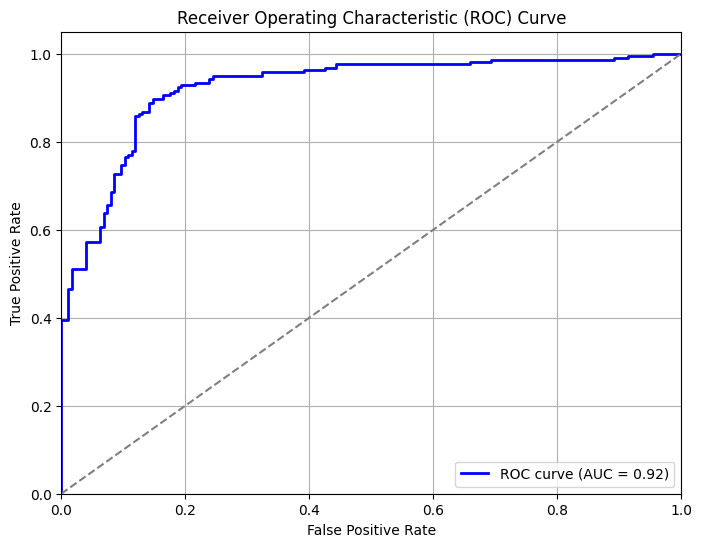

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get model predictions (probabilities)
y_pred_proba = model.predict(X_test)[:, 1]  # Assuming binary classification (probability for class 1)

# Compute ROC curve & AUC score
fpr, tpr, _ = roc_curve(y_test_classes, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
model.save("cnn_bilstm_model.h5")

CNN - Transformer

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Dense, Conv1D, MaxPooling1D, Flatten,
                                     Dropout, BatchNormalization, Reshape, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D, Add)
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
data = pd.read_csv("combined_dataset.csv").dropna()
X = data.drop("target", axis=1)
y = data["target"]

y = LabelEncoder().fit_transform(y)
y = to_categorical(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Transformer Block
def transformer_block(inputs, num_heads=4, ff_dim=32):
    """ Implements a simple Transformer block. """
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(inputs, inputs)
    attention_output = Dropout(0.1)(attention_output)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    # Feed-forward network
    ffn = Dense(ff_dim, activation="relu")(out1)
    ffn = Dense(inputs.shape[-1])(ffn)
    ffn = Dropout(0.1)(ffn)
    out2 = LayerNormalization(epsilon=1e-6)(out1 + ffn)

    return out2


# Rebuild the model architecture to EXACTLY match the original
input_layer = Input(shape=(10, 1))

# CNN Layers
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)
conv2 = Conv1D(filters=32, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling1D(pool_size=2)(conv2)
flatten = Flatten()(pool2)

# Reshape for Transformer input
timesteps = 2
feature_dim = flatten.shape[-1] // timesteps
transformer_input = Reshape((timesteps, feature_dim))(flatten)

# Transformer Layer
transformer_output = transformer_block(transformer_input)

# Global pooling
global_pool = GlobalAveragePooling1D()(transformer_output)

# Fully Connected Layers
dense1 = Dense(64, activation='relu')(global_pool)
dropout1 = Dropout(0.3)(dense1)
dense2 = Dense(32, activation='relu')(dropout1)

# Output Layer
output_layer = Dense(1, activation='sigmoid')(dense2)

# Create the model
cnn_transformer_model = Model(inputs=input_layer, outputs=output_layer)
cnn_transformer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# Train Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 13, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 10, 64)              │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 2, 128)              │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 128, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 128)                 │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,256 (1.06 MB)

 Trainable params: 92,290 (360.51 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 184,582 (721.03 KB)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.9852 - loss: 0.0333 - val_accuracy: 0.8895 - val_loss: 0.7422
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.9911 - loss: 0.0265 - val_accuracy: 0.8792 - val_loss: 0.6379
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.9913 - loss: 0.0316 - val_accuracy: 0.8792 - val_loss: 0.8420
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - accuracy: 0.9887 - loss: 0.0433 - val_accuracy: 0.8895 - val_loss: 0.7355
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9892 - loss: 0.0226 - val_accuracy: 0.8843 - val_loss: 0.7791
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.9788 - loss: 0.0618 - val_accuracy: 0.8638 - val_loss: 0.7523
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.9774 - loss: 0.0431 - val_accuracy: 0.8869 - val_loss: 0.7944
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.9787 - loss: 0.0630 - val_a

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Get model predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_test_classes = np.argmax(y_test, axis=1) # Convert one-hot encoded y_test to class labels

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_classes, y_pred_classes))

# Calculate ROC-AUC Score
if len(np.unique(y_test_classes)) == 2:
    y_pred_prob = y_pred[:, 1]  # Probability of the positive class
    print("\nROC-AUC Score:", roc_auc_score(y_test_classes, y_pred_prob))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
Accuracy: 0.8791773778920309

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       176
           1       0.87      0.92      0.89       213

    accuracy                           0.88       389
   macro avg       0.88      0.87      0.88       389
weighted avg       0.88      0.88      0.88       389


Confusion Matrix:
 [[146  30]
 [ 17 196]]

ROC-AUC Score: 0.9432351685872813


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


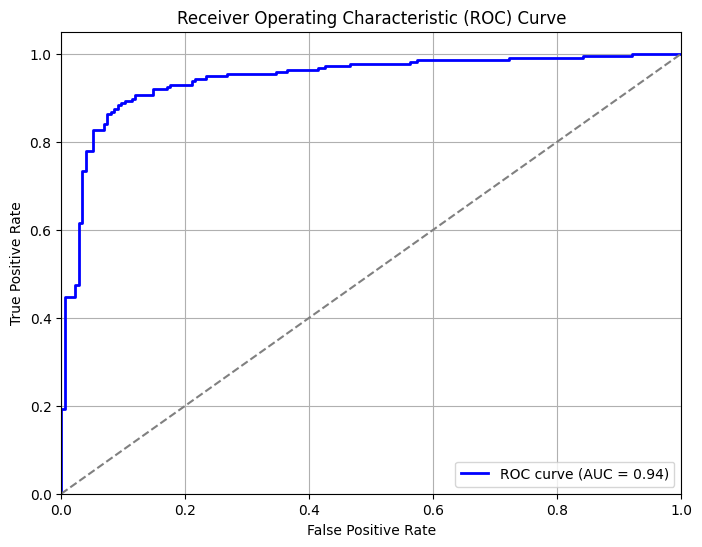

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get model predictions (probabilities)
y_pred_proba = model.predict(X_test)[:, 1]  # Assuming binary classification (probability for class 1)

# Compute ROC curve & AUC score
fpr, tpr, _ = roc_curve(y_test_classes, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
# Load the saved weights
model.save('cnn_transformer_model.h5')
#print("Model loaded successfully with weights!")

Stacking ensemble

In [ ]:
from tensorflow.keras.models import load_model
cnn_lstm_model = load_model("cnn_lstm_model.h5")
cnn_bilstm_model=load_model("cnn_bilstm_model.h5")
cnn_transformer_model = load_model("cnn_transformer_model.h5")

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("combined_dataset.csv")
X = df.drop(columns=['target']).values  # Features
y = df['target'].values  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape for CNN input after splitting
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Get model predictions (probabilities)
preds_lstm = cnn_lstm_model.predict(X_test)
preds_bilstm = cnn_bilstm_model.predict(X_test)
preds_transformer = cnn_transformer_model.predict(X_test)

# Convert predictions to a 2D array for stacking
stacked_predictions = np.column_stack((preds_lstm[:, 1], preds_bilstm[:, 1], preds_transformer[:, 1]))


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


In [ ]:
meta_model = LogisticRegression()
meta_model.fit(stacked_predictions, y_test)

# Predict on test data using the stacked model
final_preds = meta_model.predict(stacked_predictions)

# Evaluate performance
accuracy = accuracy_score(y_test, final_preds)
print(f"Stacking Ensemble Test Accuracy: {accuracy * 100:.2f}%")

Stacking Ensemble Test Accuracy: 88.43%


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Get model predictions
y_pred = meta_model.predict(stacked_predictions)
y_pred_classes = (y_pred > 0.5).astype("int32")
y_test_classes = y_test

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test_classes, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_classes, y_pred_classes))

# Calculate ROC-AUC Score
if len(np.unique(y_test_classes)) == 2:
    y_pred_prob = y_pred  # Probability of the positive class (assuming binary classification)
    print("\nROC-AUC Score:", roc_auc_score(y_test_classes, y_pred_prob))


Accuracy: 0.884318766066838

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       176
           1       0.88      0.92      0.90       213

    accuracy                           0.88       389
   macro avg       0.89      0.88      0.88       389
weighted avg       0.88      0.88      0.88       389


Confusion Matrix:
 [[148  28]
 [ 17 196]]

ROC-AUC Score: 0.8805484421681605


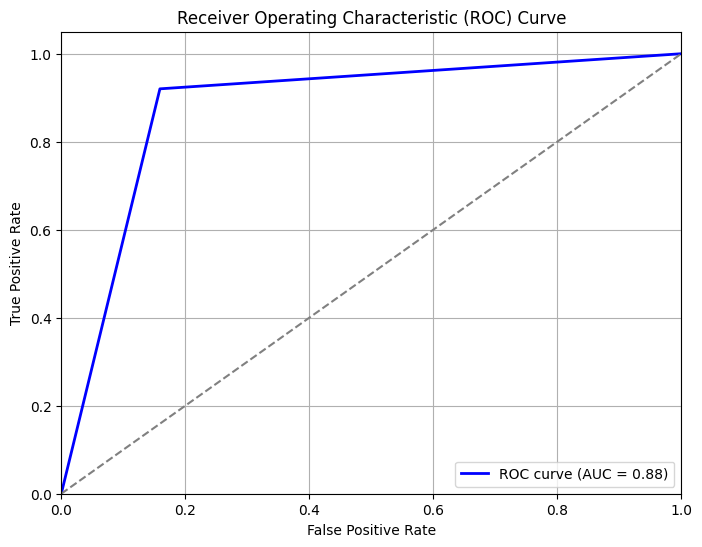

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get model predictions (probabilities)
y_pred_proba = meta_model.predict(stacked_predictions)  # Assuming binary classification (probability for class 1)

# Compute ROC curve & AUC score
fpr, tpr, _ = roc_curve(y_test_classes, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Soft voting

In [ ]:
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Predictions from individual models
pred_lstm = cnn_lstm_model.predict(X_test)
pred_bilstm = cnn_bilstm_model.predict(X_test)
pred_transformer = cnn_transformer_model.predict(X_test)

# Convert softmax outputs to class predictions
pred_lstm_class = np.argmax(pred_lstm, axis=1)
pred_bilstm_class = np.argmax(pred_bilstm, axis=1)
pred_transformer_class = np.argmax(pred_transformer, axis=1)

# Combine predictions using soft voting (average of probabilities)
avg_pred = (pred_lstm + pred_bilstm + pred_transformer) / 3
ensemble_pred_class = np.argmax(avg_pred, axis=1)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, ensemble_pred_class)
print(f"Ensemble Model Accuracy (Soft Voting): {accuracy * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Ensemble Model Accuracy (Soft Voting): 88.17%


Accuracy: 0.8817480719794345

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.86       176
           1       0.87      0.92      0.89       213

    accuracy                           0.88       389
   macro avg       0.88      0.88      0.88       389
weighted avg       0.88      0.88      0.88       389


Confusion Matrix:
 [[147  29]
 [ 17 196]]

ROC-AUC Score: 0.9416213188220229


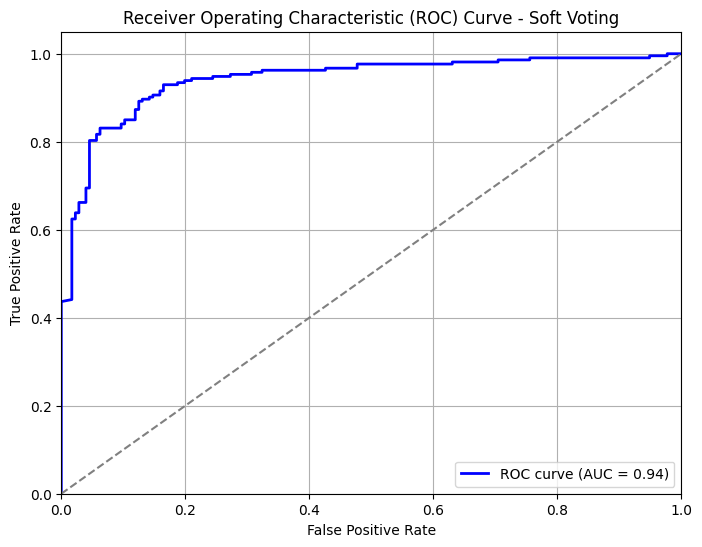

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Evaluation Metrics for Soft Voting
print("Accuracy:", accuracy_score(y_test, ensemble_pred_class))
print("\nClassification Report:\n", classification_report(y_test, ensemble_pred_class))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, ensemble_pred_class))

# Calculate ROC-AUC Score
if len(np.unique(y_test)) == 2:
    # Assuming binary classification, use probabilities for class 1
    y_pred_prob = avg_pred[:, 1]
    print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


# Compute ROC curve & AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Soft Voting')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Roc for hybrid model

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


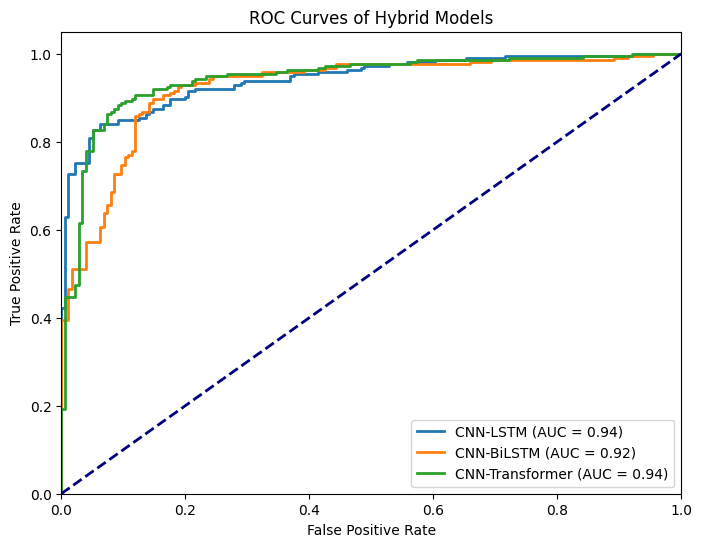

In [ ]:

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have already trained and saved your models (cnn_lstm_model, cnn_bilstm_model, cnn_transformer_model) and have X_test and y_test
# ... (your existing code for model training and predictions)

# Load the saved models
cnn_lstm_model = load_model("cnn_lstm_model.h5")
cnn_bilstm_model = load_model("cnn_bilstm_model.h5")
cnn_transformer_model = load_model("cnn_transformer_model.h5")

# Load dataset  # Define X_test and y_test
df = pd.read_csv("combined_dataset.csv")
X = df.drop(columns=['target']).values  # Features
y = df['target'].values  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape for CNN input after splitting
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


models = {
    "CNN-LSTM": cnn_lstm_model,
    "CNN-BiLSTM": cnn_bilstm_model,
    "CNN-Transformer": cnn_transformer_model
}

plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    y_pred_prob = model.predict(X_test)[:, 1]  # Assuming binary classification
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Hybrid Models')
plt.legend(loc="lower right")
plt.show()